<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
# Introduction to openEO  using ILWISPy as processing backend

Notebook prepared by Ben Maathuis and Bas Retsios. ITC-University of Twente, Enschede. The Netherlands.
Note that authentication details for GEE access was obtained from internet resources (source: https://github.com/Open-EO/openeo-earthengine-driver)

### To get started with openEO Platform review a number of online resources first.

Review the article "The openEO API–Harmonising the Use of Earth Observation Cloud Services Using Virtual Data Cube Functionalities"
https://www.researchgate.net/publication/350109855_The_openEO_API-Harmonising_the_Use_of_Earth_Observation_Cloud_Services_Using_Virtual_Data_Cube_Functionalities

#### Review:
A list of all known openEO providers and their services:
https://hub.openeo.org/

####  Review: 
Check the collections and editor functionality at:
https://editor.openeo.cloud/  

#### Review:
Get some more information on the data cube concepts:
https://openeo.org/documentation/1.0/datacubes.html

Check the required site packages, if not installed already, ensure that they are available before you continue. Install required site packages with command 'pip install *package*'

This notebook will create within this notebook folder a sub-directory 'Intro_openEO_ILWISPy' used to store the downloaded data and will be assigned as your ILWISPy working-directory.

#### Connect to openEO Platform and print list of available collections

In [1]:
import os
import ilwis
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import openeo
from zipfile import ZipFile
from datetime import date, timedelta, datetime
import numpy as np
from pathlib import Path

#### Import ILWISPy and set working folder

In [2]:
ilwis.version()

'1.0 build 20250227'

In [5]:
#create folder if the folder is not existing
Path('./Intro_openEO_ILWISPy').mkdir(parents=True, exist_ok=True)

In [6]:
work_dir = os.getcwd() + '/Intro_openEO_ILWISPy'

#set the working directory for ILWISPy
ilwis.setWorkingCatalog(work_dir)
print(work_dir)

/home/ilwispy/notebooks/ilwispy_tutorial/Intro_openEO_ILWISPy


#### Check OpenEO version and connect to the Earth Engine OpenEO Demo Version

In [7]:
openeo.__version__

'0.35.0'

In [8]:
connection = openeo.connect("https://earthengine.openeo.org/v1.0")

In [9]:
#https://openeo.org/documentation/1.0/python/#full-example
#connection.authenticate_basic("username", "password")

print("Authenticate with Basic authentication")
connection.authenticate_basic("group1", "test123")

Authenticate with Basic authentication


<Connection to 'https://earthengine.openeo.org/v1.0' with BasicBearerAuth>

#### Get started with the openEO Python Client. 
Before you continue review the information provided at: https://docs.openeo.cloud/getting-started/python/#connect-to-openeo-platform-and-explore

Processes in openEO are operations that can be applied on (EO) data (e.g. calculate the mean of an array, or mask out observations outside a given polygon). The output of one process can be used as the input of another process, and by doing so, multiple processes can be connected that way in a larger "process graph" that implements a certain algorithm.

In [10]:
connection.list_processes()

[{'id': 'absolute',
  'summary': 'Absolute value',
  'description': 'Computes the absolute value of a real number `x`, which is the "unsigned" portion of `x` and often denoted as *|x|*.\n\nNo-data values are passed through.',
  'categories': ['math'],
  'parameters': [{'name': 'x',
    'description': 'A number.',
    'schema': {'type': ['number', 'null']}}],
  'returns': {'description': 'The computed absolute value.',
   'schema': {'type': ['number', 'null'], 'minimum': 0}},
  'examples': [{'arguments': {'x': 3.5}, 'returns': 3.5},
   {'arguments': {'x': -0.4}, 'returns': 0.4}],
  'links': [{'rel': 'about',
    'href': 'http://mathworld.wolfram.com/AbsoluteValue.html',
    'title': 'Absolute value explained by Wolfram MathWorld'}]},
 {'id': 'add',
  'summary': 'Addition of two numbers',
  'description': 'Sums up the two numbers `x` and `y` (*`x + y`*) and returns the computed sum.\n\nNo-data values are taken into account so that the no-data value is returned if any element is such a value.\n\nThe computations follow [IEEE Standard 754](https://ieeexplore.ieee.org/document/8766229) whenever the processing environment supports it.',
  'categories': ['math'],
  'parameters': [{'name': 'x',
    'description': 'The first summand.',
    'schema': {'type': ['number', 'null']}},
   {'name': 'y',
    'description': 'The second summand.',
    'schema': {'type': ['number', 'null']}}],
  'returns': {'description': 'The computed sum of the two numbers.',
   'schema': {'type': ['number', 'null']}},
  'examples': [{'arguments': {'x': 5, 'y': 2.5}, 'returns': 7.5},
   {'arguments': {'x': -2, 'y': -4}, 'returns': -6},
   {'arguments': {'x': 1, 'y': None}, 'returns': None}],
  'links': [{'rel': 'about',
    'href': 'http://mathworld.wolfram.com/Sum.html',
    'title': 'Sum explained by Wolfram MathWorld'},
   {'rel': 'about',
    'href': 'https://ieeexplore.ieee.org/document/8766229',
    'title': 'IEEE Standard 754-2019 for Floating-Point Arithmetic'}]},
 {'id': 'add_dimension',
  'summary': 'Add a new dimension',
  'description': 'Adds a new named dimension to the data cube.\n\nAfterwards, the dimension can be referred to with the specified `name`. If a dimension with the specified name exists, the process fails with a `DimensionExists` exception. The dimension label of the dimension is set to the specified `label`.',
  'categories': ['cubes'],
  'experimental': True,
  'parameters': [{'name': 'data',
    'description': 'A data cube to add the dimension to.',
    'schema': {'type': 'object', 'subtype': 'raster-cube'}},
   {'name': 'name',
    'description': 'Name for the dimension.',
    'schema': {'type': 'string'}},
   {'name': 'label',
    'description': 'A dimension label.',
    'schema': [{'type': 'number'}, {'type': 'string'}]},
   {'name': 'type',
    'description': 'The type of dimension, defaults to `other`.',
    'schema': {'type': 'string', 'enum': ['temporal', 'bands', 'other']},
    'default': 'other',
    'optional': True}],
  'returns': {'description': 'The data cube with a newly added dimension. The new dimension has exactly one dimension label. All other dimensions remain unchanged.',
   'schema': {'type': 'object', 'subtype': 'raster-cube'}},
  'exceptions': {'DimensionExists': {'message': 'A dimension with the specified name already exists.'}}},
 {'id': 'aggregate_temporal',
  'summary': 'Temporal aggregations',
  'description': 'Computes a temporal aggregation based on an array of temporal intervals.\n\nFor common regular calendar hierarchies such as year, month, week or seasons ``aggregate_temporal_period()`` can be used. Other calendar hierarchies must be transformed into specific intervals by the clients.\n\nFor each interval, all data along the dimension will be passed through the reducer.\n\nThe computed values will be projected to the labels. If no labels are specified, the start of the temporal interval will be used as label for the corresponding values. In case of a conflict (i.e. the user-specified values for the 

#### Obtain information about available collections  - data sources

In [11]:
print(connection.list_collection_ids())

['USGS/3DEP/10m', 'USGS/3DEP/1m', 'AAFC/ACI', 'ACA/reef_habitat/v1_0', 'ACA/reef_habitat/v2_0', 'AHN/AHN2_05M_INT', 'AHN/AHN2_05M_NON', 'AHN/AHN2_05M_RUW', 'AHN/AHN3', 'AHN/AHN4', 'ASTER/AST_L1T_003', 'NASA/ASTER_GED/AG100_003', 'AU/GA/AUSTRALIA_5M_DEM', 'AU/GA/DEM_1SEC/v10/DEM-H', 'AU/GA/DEM_1SEC/v10/DEM-S', 'BIOPAMA/GlobalOilPalm/v1', 'BNETD/land_cover/v1', 'BNU/FGS/CCNL/v1', 'CAS/IGSNRR/PML/V2', 'CAS/IGSNRR/PML/V2_v017', 'CAS/IGSNRR/PML/V2_v018', 'CANADA/NFIS/NTEMS/CA_FOREST_AGE', 'NOAA/CDR/ATMOS_NEAR_SURFACE/V2', 'NOAA/CDR/AVHRR/AOT/V3', 'NOAA/CDR/AVHRR/LAI_FAPAR/V4', 'NOAA/CDR/AVHRR/LAI_FAPAR/V5', 'NOAA/CDR/AVHRR/NDVI/V4', 'NOAA/CDR/AVHRR/NDVI/V5', 'NOAA/CDR/AVHRR/SR/V4', 'NOAA/CDR/AVHRR/SR/V5', 'NOAA/CDR/GRIDSAT-B1/V2', 'NOAA/CDR/HEAT_FLUXES/V2', 'NOAA/CDR/OISST/V2', 'NOAA/CDR/OISST/V2_1', 'NOAA/CDR/PATMOSX/V53', 'NOAA/CDR/SST_PATHFINDER/V53', 'NOAA/CDR/SST_WHOI/V2', 'NOAA/CFSV2/FOR6H', 'CGIAR/SRTM90_V4', 'CIESIN/GPWv411/GPW_Basic_Demographic_Characteristics', 'CIESIN/GPWv411/GPW

In [12]:
print(connection.list_collections()[0])

{'stac_version': '1.0.0', 'stac_extensions': [], 'type': 'Collection', 'id': 'USGS/3DEP/10m', 'title': 'USGS 3DEP 10m National Map Seamless (1/3 Arc-Second)', 'description': 'This is the seamless 3DEP DEM dataset for the U.S.\nwith full coverage of the 48 conterminous states, Hawaii, and\nU.S. territories. Alaska coverage is partially available now and is being\nexpanded to statewide coverage as part of the Alaska Mapping Initiative.\nGround spacing is approximately 10 meters north/south, but variable\neast/west due to convergence of meridians with latitude.\n\nSpatial metadata dataset is ingested as a separate asset\n[USGS_3DEP_10m_metadata](USGS_3DEP_10m_metadata).\n\nThe 1m dataset is ingested\nas [USGS_3DEP_1m](USGS_3DEP_1m).\n\nDataset uploaded by [Farmers Business Network](https://fbn.com).\n', 'license': 'proprietary', 'extent': {'spatial': {'bbox': [[-171, -16.6, 164, 76.9]]}, 'temporal': {'interval': [['1998-08-16T00:00:00Z', '2020-05-06T00:00:00Z']]}}, 'links': [{'href': 'htt

#### Print 1st collection from the list
Note the index number, it starts from 0

In [13]:
print(connection.list_collections()[0:3])

[{'stac_version': '1.0.0', 'stac_extensions': [], 'type': 'Collection', 'id': 'USGS/3DEP/10m', 'title': 'USGS 3DEP 10m National Map Seamless (1/3 Arc-Second)', 'description': 'This is the seamless 3DEP DEM dataset for the U.S.\nwith full coverage of the 48 conterminous states, Hawaii, and\nU.S. territories. Alaska coverage is partially available now and is being\nexpanded to statewide coverage as part of the Alaska Mapping Initiative.\nGround spacing is approximately 10 meters north/south, but variable\neast/west due to convergence of meridians with latitude.\n\nSpatial metadata dataset is ingested as a separate asset\n[USGS_3DEP_10m_metadata](USGS_3DEP_10m_metadata).\n\nThe 1m dataset is ingested\nas [USGS_3DEP_1m](USGS_3DEP_1m).\n\nDataset uploaded by [Farmers Business Network](https://fbn.com).\n', 'license': 'proprietary', 'extent': {'spatial': {'bbox': [[-171, -16.6, 164, 76.9]]}, 'temporal': {'interval': [['1998-08-16T00:00:00Z', '2020-05-06T00:00:00Z']]}}, 'links': [{'href': 'ht

#### Get detailed information about a collection

In [14]:
print(connection.describe_collection("COPERNICUS/Landcover/100m/Proba-V-C3/Global")) #text listing

connection.describe_collection("COPERNICUS/Landcover/100m/Proba-V-C3/Global") #web listing

{'description': 'The Copernicus Global Land Service (CGLS) is earmarked as a component of\nthe Land service to operate a multi-purpose service component that provides\na series of bio-geophysical products on the status and evolution of land\nsurface at global scale.\n\nThe Dynamic Land Cover map at 100 m resolution (CGLS-LC100) is a new product\nin the portfolio of the CGLS and delivers a global land cover map at 100 m\nspatial resolution. The CGLS Land Cover product provides a primary land\ncover scheme. Next to these discrete classes, the product also includes\ncontinuous field layers for all basic land cover classes that provide\nproportional estimates for vegetation/ground cover for the land cover types.\nThis continuous classification scheme may depict areas of heterogeneous\nland cover better than the standard classification scheme and, as such,\ncan be tailored for application use (e.g. forest monitoring, crop monitoring,\nbiodiversity and conservation, monitoring environment an

{'description': 'The Copernicus Global Land Service (CGLS) is earmarked as a component of\nthe Land service to operate a multi-purpose service component that provides\na series of bio-geophysical products on the status and evolution of land\nsurface at global scale.\n\nThe Dynamic Land Cover map at 100 m resolution (CGLS-LC100) is a new product\nin the portfolio of the CGLS and delivers a global land cover map at 100 m\nspatial resolution. The CGLS Land Cover product provides a primary land\ncover scheme. Next to these discrete classes, the product also includes\ncontinuous field layers for all basic land cover classes that provide\nproportional estimates for vegetation/ground cover for the land cover types.\nThis continuous classification scheme may depict areas of heterogeneous\nland cover better than the standard classification scheme and, as such,\ncan be tailored for application use (e.g. forest monitoring, crop monitoring,\nbiodiversity and conservation, monitoring environment and security in Africa,\nclimate modelling, etc.).\n\nThese consistent Land Cover maps (v3.0.1) are provided for the period\n2015-2019 over the entire Globe, derived from the PROBA-V 100 m time-series, a\ndatabase of high quality land cover training sites and several ancillary\ndatasets, reaching an accuracy of 80% at Level1 over al years.  It is planned\nto provide yearly updates from 2020 through the use of a Sentinel time-series.\n\nSee also:\n\n* [Algorithm Theoretical Basis Document](https://doi.org/10.5281/zenodo.3938968)\n\n* [Product User Manual](https://doi.org/10.5281/zenodo.3938963)\n\n* [Validation Report](https://doi.org/10.5281/zenodo.3938974)\n',
 'extent': {'spatial': {'bbox': [[-180, -90, 180, 90]]},
  'temporal': {'interval': [['2015-01-01T00:00:00Z',
     '2019-12-31T23:59:59Z']]}},
 'gee:terms_of_use': 'As official product of the global component of the Copernicus Land Service,\naccess to this land cover dataset is fully free and open to all users.\n',
 'gee:type': 'image_collection',
 'gee:user_uploaded': True,
 'id': 'COPERNICUS/Landcover/100m/Proba-V-C3/Global',
 'keywords': ['copernicus',
  'eea',
  'esa',
  'eu',
  'landcover',
  'proba',
  'probav',
  'vito'],
 'license': 'proprietary',
 'links': [{'href': 'https://earthengine.openeo.org/v1.0/collections/COPERNICUS/Landcover/100m/Proba-V-C3/Global',
   'rel': 'self',
   'type': 'application/json'},
  {'href': 'https://earthengine.openeo.org/v1.0/',
   'rel': 'parent',
   'type': 'application/json'},
  {'href': 'https://earthengine.openeo.org/v1.0/',
   'rel': 'root',
   'type': 'application/json'},
  {'code': 'JavaScript',
   'href': 'https://code.earthengine.google.com/?scriptPath=Examples:Datasets/COPERNICUS/COPERNICUS_Landcover_100m_Proba-V-C3_Global',
   'rel': 'related',
   'title': 'Run the example for COPERNICUS/Landcover/100m/Proba-V-C3/Global in the Earth Engine Code Editor',
   'type': 'text/html'},
  {'href': 'https://developers.google.com/earth-engine/datasets/images/COPERNICUS/COPERNICUS_Landcover_100m_Proba-V-C3_Global_sample.png',
   'rel': 'preview',
   'type': 'image/png'},
  {'href': 'https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_Landcover_100m_Proba-V-C3_Global#terms-of-use',
   'rel': 'license',
   'type': 'text/html'},
  {'href': 'https://lcviewer.vito.be/download', 'rel': 'source'},
  {'href': 'https://doi.org/10.5281/zenodo.3518026', 'rel': 'cite-as'},
  {'href': 'https://doi.org/10.5281/zenodo.3518036', 'rel': 'cite-as'},
  {'href': 'https://doi.org/10.5281/zenodo.3518038', 'rel': 'cite-as'},
  {'href': 'https://doi.org/10.5281/zenodo.3939038', 'rel': 'cite-as'},
  {'href': 'https://doi.org/10.5281/zenodo.3939050', 'rel': 'cite-as'},
  {'href': 'https://storage.googleapis.com/earthengine-stac/catalog/COPERNICUS/COPERNICUS_Landcover_100m_Proba-V-C3_Global.json',
   'rel': 'latest-version',
   'title': 'COPERNICUS/Landcover/100m/Proba-V-C3/Global',
   'type': 'application/json'},
  {'href': 'https://storage.googleapis.com/eart

#### Load the selected collection, here the spatial extent used is over the Cape Verde islands

In [15]:
# Load data cube from GEE collection.
cube = connection.load_collection(
    "COPERNICUS/Landcover/100m/Proba-V-C3/Global",
    spatial_extent={"west": -25.5, "south": 14.5, "east": -22.5, "north": 17.25},
    temporal_extent=["2015-01-01", "2019-12-31"],
    bands=["discrete_classification"],
)

In [16]:
cube.download(r'./Intro_openEO_ILWISPy/lc.tif')

In [17]:
#load raster in ILWISPy
rcDC = ilwis.RasterCoverage('lc.tif')

In [18]:
# probe its size
print(rcDC.size().xsize)
print(rcDC.size().ysize)
print(rcDC.size().zsize)

3341
3062
1


In [19]:
#transform raster from ILWIS to Numpy
rcDC2np = np.fromiter(iter(rcDC), np.ubyte, rcDC.size().linearSize()) 
rcDC2np = rcDC2np.reshape((rcDC.size().zsize, rcDC.size().ysize, rcDC.size().xsize))
print(rcDC2np.shape)

(1, 3062, 3341)


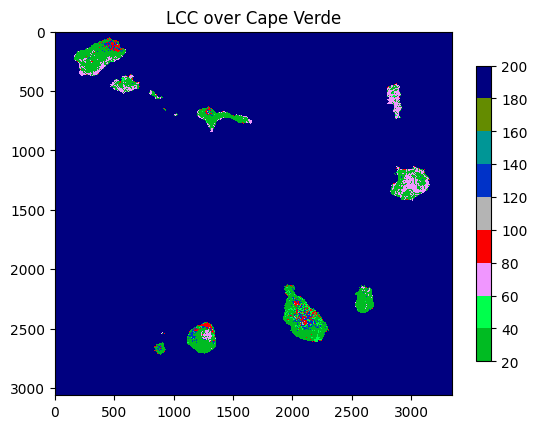

In [20]:
#dispay numpy array
plt.imshow(rcDC2np[0], interpolation='none', cmap=ListedColormap(['#00BB22','#00FF4C', '#F096FF', '#FA0000', '#B4B4B4', '#0032C8', '#009696', '#648C00', '#000080'])) 
plt.axis('on')
plt.colorbar(shrink=0.8)
plt.title('LCC over Cape Verde');

In [21]:
#Export as ILWIS raster map
rcDC.store('CapeVerde_LCC.mpr')

#### Extract rainfall for a region in Zambia for a single day

In [22]:
connection.describe_collection("UCSB-CHG/CHIRPS/DAILY")

{'description': 'Climate Hazards Center InfraRed Precipitation with Station data (CHIRPS)\nis a 30+ year quasi-global rainfall dataset. CHIRPS incorporates\n0.05° resolution satellite imagery with in-situ station data\nto create gridded rainfall time series for trend analysis and seasonal\ndrought monitoring.\n',
 'extent': {'spatial': {'bbox': [[-180, -50, 180, 50]]},
  'temporal': {'interval': [['1981-01-01T00:00:00Z',
     '2025-01-31T00:00:00Z']]}},
 'gee:interval': {'interval': 1, 'type': 'cadence', 'unit': 'day'},
 'gee:terms_of_use': 'This datasets are in the public domain. To the extent possible under law,\n[Pete Peterson](https://chc.ucsb.edu/people/pete-peterson)\nhas waived all copyright and related or neighboring rights to\nClimate Hazards Center Infrared Precipitation with Stations (CHIRPS).\n',
 'gee:type': 'image_collection',
 'id': 'UCSB-CHG/CHIRPS/DAILY',
 'keywords': ['chg',
  'climate',
  'geophysical',
  'precipitation',
  'ucsb',
  'weather'],
 'license': 'proprietary',
 'links': [{'href': 'https://earthengine.openeo.org/v1.0/collections/UCSB-CHG/CHIRPS/DAILY',
   'rel': 'self',
   'type': 'application/json'},
  {'href': 'https://earthengine.openeo.org/v1.0/',
   'rel': 'parent',
   'type': 'application/json'},
  {'href': 'https://earthengine.openeo.org/v1.0/',
   'rel': 'root',
   'type': 'application/json'},
  {'code': 'JavaScript',
   'href': 'https://code.earthengine.google.com/?scriptPath=Examples:Datasets/UCSB-CHG/UCSB-CHG_CHIRPS_DAILY',
   'rel': 'related',
   'title': 'Run the example for UCSB-CHG/CHIRPS/DAILY in the Earth Engine Code Editor',
   'type': 'text/html'},
  {'href': 'https://developers.google.com/earth-engine/datasets/images/UCSB-CHG/UCSB-CHG_CHIRPS_DAILY_sample.png',
   'rel': 'preview',
   'type': 'image/png'},
  {'href': 'https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY#terms-of-use',
   'rel': 'license',
   'type': 'text/html'},
  {'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
   'href': 'https://earthengine.openeo.org/v1.0/collections/UCSB-CHG/CHIRPS/DAILY/queryables',
   'title': 'Queryables',
   'type': 'application/schema+json'},
  {'rel': 'items',
   'href': 'https://earthengine.openeo.org/v1.0/collections/UCSB-CHG/CHIRPS/DAILY/items',
   'type': 'application/geo+json'}],
 'providers': [{'name': 'UCSB/CHG',
   'roles': ['licensor', 'producer'],
   'url': 'https://chc.ucsb.edu/data/chirps'},
  {'name': 'Google Earth Engine',
   'roles': ['host'],
   'url': 'https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY'}],
 'sci:citation': 'Funk, Chris, Pete Peterson, Martin Landsfeld, Diego Pedreros, James\nVerdin, Shraddhanand Shukla, Gregory Husak, James Rowland, Laura Harrison,\nAndrew Hoell & Joel Michaelsen. "The climate hazards infrared precipitation\nwith stations-a new environmental record for monitoring extremes".\nScientific Data 2, 150066. [doi:10.1038/sdata.2015.66](https://doi.org/10.1038/sdata.2015.66)\n2015.\n',
 'stac_extensions': ['https://stac-extensions.github.io/datacube/v2.2.0/schema.json'],
 'stac_version': '1.0.0',
 'summaries': {'eo:bands': [{'description': 'Precipitation',
    'gee:units': 'mm/d',
    'name': 'precipitation'}],
  'gee:visualizations': [{'display_name': 'Precipitation',
    'image_visualization': {'band_vis': {'bands': ['precipitation'],
      'max': [17],
      'min': [1],
      'palette': ['001137', '0aab1e', 'e7eb05', 'ff4a2d', 'e90000']}},
    'lookat': {'lat': 7.71, 'lon': 17.93, 'zoom': 2}}],
  'gsd': [5566],
  'precipitation': {'gee:estimated_range': True,
   'maximum': 1444.34,
   'minimum': 0}},
 'title': 'CHIRPS Daily: Climate Hazards Center InfraRed Precipitation With Station Data (Version 2.0 Final)',
 'type': 'Collection',
 'version': '2.0',
 'cube:dimensions': {'x': {'type': 'spatial',
   'axis': 'x',
   'extent': [-180, 180]},
  'y': {'type': 'spatial', 'axis': 'y', 'extent': [-50, 50]},
  't': {'type': 'temporal',
   'extent': ['1981-01-01T00:00:00Z', '202

In [23]:
# create time stamp for single CHIRPS Daily Rainfall map retrieval
year = 2018
month = 1
day_start = 1

date_start = date(year, month, day_start)
start_string = date_start.strftime('%Y%m%d')
print(start_string)

one_day = timedelta(days=1)

date_end = date_start + one_day
end_string = date_end.strftime('%Y%m%d')
print(end_string)

20180101
20180102


In [24]:
#note that there are limitiations to the size of the spatial extent, so here a small (2 by 2 degree) window is selected over Zambia

cube = connection.load_collection(
    "UCSB-CHG/CHIRPS/DAILY",
    spatial_extent={"west": 26, "south": -14, "east": 28, "north": -12},
    temporal_extent=[date_start, date_end],
    bands=["precipitation"],
)

In [25]:
cube.download(work_dir+'/pcp_chirps_'+start_string+'_single.tif')

In [26]:
#load precipitation raster in ILWIS
pcp_in = ilwis.RasterCoverage('pcp_chirps_'+start_string+'_single.tif')
print(pcp_in)

pcp_chirps_20180101_single.tif


In [27]:
# probe its size
print(pcp_in.size().xsize)
print(pcp_in.size().ysize)
print(pcp_in.size().zsize)

2227
2227
1


[(0.0, 2696604.0), (0.1144029901382771, 0.0), (0.2288059802765542, 0.0), (0.3432089704148313, 0.0), (0.4576119605531084, 0.0), (0.5720149506913854, 0.0), (0.6864179408296626, 0.0), (0.8008209309679397, 0.0), (0.9152239211062168, 0.0), (1.0296269112444938, 0.0), (1.1440299013827708, 0.0), (1.258432891521048, 0.0), (1.3728358816593251, 0.0), (1.4872388717976022, 0.0), (1.6016418619358794, 0.0), (1.7160448520741565, 0.0), (1.8304478422124335, 0.0), (1.9448508323507105, 0.0), (2.0592538224889876, 0.0), (2.173656812627265, 0.0), (2.2880598027655417, 0.0), (2.402462792903819, 0.0), (2.516865783042096, 0.0), (2.631268773180373, 0.0), (2.7456717633186503, 0.0), (2.8600747534569275, 0.0), (2.9744777435952043, 0.0), (3.0888807337334816, 0.0), (3.203283723871759, 0.0), (3.3176867140100357, 0.0), (3.432089704148313, 3080.0), (3.5464926942865898, 0.0), (3.660895684424867, 3080.0), (3.7752986745631443, 3136.0), (3.889701664701421, 0.0), (4.004104654839698, 0.0), (4.118507644977975, 0.0), (4.23291063

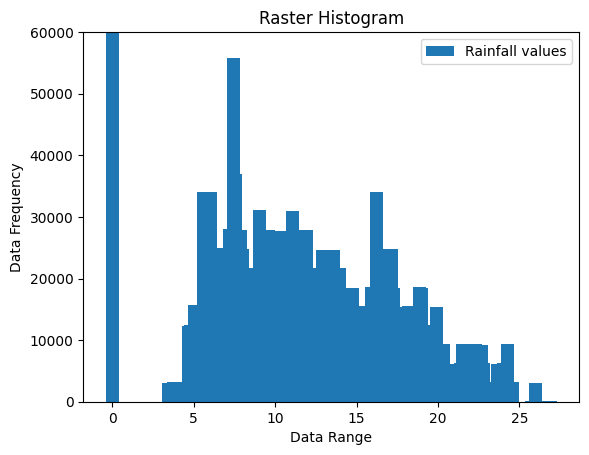

In [28]:
#calculate basis image statistics and show histogram
stats_input = pcp_in.statistics(ilwis.PropertySets.pHISTOGRAM)
print(stats_input.histogram())
print()
print('Minimum: ',stats_input[ilwis.PropertySets.pMIN]) 
print('Maximum: ',stats_input[ilwis.PropertySets.pMAX]) 
print('Mean: ',stats_input[ilwis.PropertySets.pMEAN]) 
print('No pixels - also nodata: ',stats_input[ilwis.PropertySets.pCOUNT]) 
print('No pixels - no nodata: ',stats_input[ilwis.PropertySets.pNETTOCOUNT]) 
print('Sum all: ',stats_input[ilwis.PropertySets.pSUM]) 

print()
x=[a for (a,b) in stats_input.histogram()][:-1] 
y=[b for (a,b) in stats_input.histogram()][:-1]

plt.bar(x,y,label='Rainfall values')
plt.xlabel('Data Range')
plt.ylabel('Data Frequency')
plt.title('Raster Histogram')
plt.ylim(0,60000)
plt.legend()

In [29]:
#transform from ilwis to numpy array to be able to show it using imshow
pcp_in2np = np.fromiter(iter(pcp_in), np.ubyte, pcp_in.size().linearSize()) 
pcp_in2np = pcp_in2np.reshape((pcp_in.size().zsize, pcp_in.size().ysize, pcp_in.size().xsize))
print(pcp_in2np.shape)

(1, 2227, 2227)


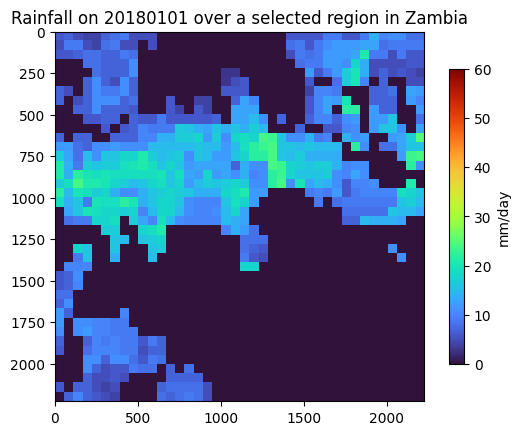

In [30]:
plt.imshow(pcp_in2np[0], interpolation='none', vmin = 0, vmax = 60, cmap = 'turbo') 
plt.axis('on')
plt.colorbar(shrink=0.8).set_label('mm/day')
plt.title('Rainfall on '+start_string+' over a selected region in Zambia');

#### Multi temporal import - extract CHIRPS rainfall for a full month

Currently GEE in OpenEO does not facilitate multiband tif file creation and download. Now a loop is used to import single time steps to lateron create a multitemporal dataset

In [31]:
# Load data cube from GEE collection, example CHIRPS - Daily.

def download(date_start, date_end, date_start_fn):
    cube = connection.load_collection(
        "UCSB-CHG/CHIRPS/DAILY",
        spatial_extent={"west": 26, "south": -14, "east": 28, "north": -12},
        temporal_extent=[date_start, date_end],
        bands=["precipitation"],
    )
    cube.download(work_dir+'/pcp_chirps_'+date_start_fn+'.tif')

In [32]:
#for temporal extent: "2018-01-01", "2018-01-31"
#if you want to change specify appropriate year, month, day_start and day_end (of specified month)

year = 2018
month = 1
day_start = 1
day_end = 31

one_day = timedelta(days=1)

for day in range(day_start,day_end + 1):
    date_start = date(year, month, day)
    date_end = date_start + one_day
    date_start_fn = date_start.strftime('%Y%m%d')
    print('Downloading', date_start_fn)
    download(date_start,date_end,date_start_fn)    

##### Data check using the same time stamp as for the single image download

In [33]:
rcday1 = ilwis.RasterCoverage('pcp_chirps_20180101.tif')

In [34]:
# probe its size
print(rcday1.size().xsize)
print(rcday1.size().ysize)
print(rcday1.size().zsize)

2227
2227
1


In [35]:
rcRain2np = np.fromiter(iter(rcday1), np.float64, rcday1.size().linearSize()) 
rcRain2np = rcRain2np.reshape((rcday1.size().zsize, rcday1.size().ysize, rcday1.size().xsize))
print(rcRain2np.shape)

(1, 2227, 2227)


In [36]:
stats_rain = rcday1.statistics(ilwis.PropertySets.pHISTOGRAM)
print('PCP-Minimum: ',stats_rain[ilwis.PropertySets.pMIN]) 
print('PCP-Maximum: ',stats_rain[ilwis.PropertySets.pMAX]) 

x=[a for (a,b) in stats_rain.histogram()][:-1] 
y=[b for (a,b) in stats_rain.histogram()][:-1]

PCP-Minimum:  0.0
PCP-Maximum:  26.884702682495117


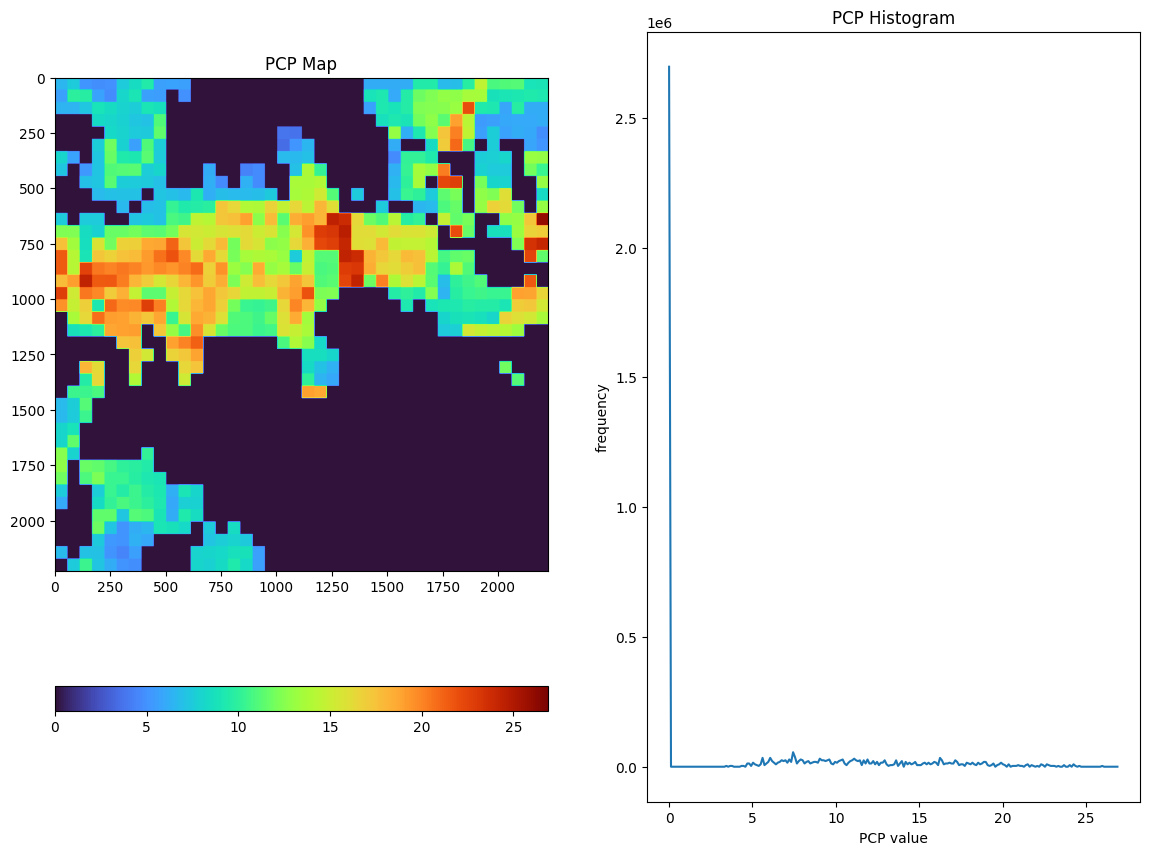

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 10))
im = ax1.imshow(rcRain2np[0], cmap = 'turbo')
plt.colorbar(im, ax=ax1, orientation="horizontal")
ax1.set_title("PCP Map")
ax2.plot(x,y,label='Raster Map values')
ax2.set_title("PCP Histogram")
ax2.set_xlabel("PCP value")
ax2.set_ylabel("frequency");

In [38]:
print(rcday1.size())
print(rcday1.envelope())
coordSys = rcday1.coordinateSystem()
coordSys.toWKT()

Size(2227, 2227, 1)
25.999939 -14.000244 28.000487 -11.999696


'PROJCS["pcp_chirps_20180101.tif",GEOCS["pcp_chirps_20180101.tif",DATUM[" WGS 84",[DWGS84],ELLIPSOID["WGS 84",6378137.000000000000,298.257223563000],PRIMEM["Greenwich",0, AUTHORITY["EPSG",8901"]]],PROJECTION[""],,UNIT[degrees,1.0]]'

In [39]:
pcpgrf = rcday1.geoReference()
print(pcpgrf)

pcp_chirps_20180101.tif


In [40]:
#create empty ilwis raster 
pcpAll = ilwis.RasterCoverage()
defNumr = ilwis.DataDefinition(ilwis.NumericDomain('code=value'), ilwis.NumericRange(0, 1000, 0))
pcpAll.setDataDef(defNumr)
pcpAll.setSize(ilwis.Size(1000, 918, 31))
pcpAll.setGeoReference(rcday1.geoReference())

In [41]:
pcpAllNp = []
for day in range(day_start,day_end + 1):
    date_start = date(year, month, day)
    date_start_fn = date_start.strftime('%Y%m%d')
    filename = 'pcp_chirps_' + date_start_fn + '.tif'
    print('Reading:', filename)
    rc = ilwis.RasterCoverage(filename) # open in ILWIS
    rc2Np = np.fromiter(iter(rc), np.float64, rc.size().linearSize()) #extract pixel data for all layers (1-D)
    rc2Np = rc2Np.reshape((rc.size().ysize, rc.size().xsize)) # reshape to 2-D
    pcpAllNp.append(rc2Np) # append all data to array
pcpAllNp = np.array(pcpAllNp) # create 3 D-array
print(np.shape(pcpAllNp))

Reading: pcp_chirps_20180101.tif
Reading: pcp_chirps_20180102.tif
Reading: pcp_chirps_20180103.tif
Reading: pcp_chirps_20180104.tif
Reading: pcp_chirps_20180105.tif
Reading: pcp_chirps_20180106.tif
Reading: pcp_chirps_20180107.tif
Reading: pcp_chirps_20180108.tif
Reading: pcp_chirps_20180109.tif
Reading: pcp_chirps_20180110.tif
Reading: pcp_chirps_20180111.tif
Reading: pcp_chirps_20180112.tif
Reading: pcp_chirps_20180113.tif
Reading: pcp_chirps_20180114.tif
Reading: pcp_chirps_20180115.tif
Reading: pcp_chirps_20180116.tif
Reading: pcp_chirps_20180117.tif
Reading: pcp_chirps_20180118.tif
Reading: pcp_chirps_20180119.tif
Reading: pcp_chirps_20180120.tif
Reading: pcp_chirps_20180121.tif
Reading: pcp_chirps_20180122.tif
Reading: pcp_chirps_20180123.tif
Reading: pcp_chirps_20180124.tif
Reading: pcp_chirps_20180125.tif
Reading: pcp_chirps_20180126.tif
Reading: pcp_chirps_20180127.tif
Reading: pcp_chirps_20180128.tif
Reading: pcp_chirps_20180129.tif
Reading: pcp_chirps_20180130.tif
Reading: p

In [42]:
pcpAll.array2raster(pcpAllNp)
print(pcpAll.size())

Size(2227, 2227, 31)


Check imported data, it's size and value for a given pixel

In [43]:
print(pcpAll.size())
for day in range(31):
    print(pcpAll.pix2value(ilwis.Pixel(100,101,day)))#just to show that data is there

Size(2227, 2227, 31)
9.946399688720703
0.0
19.892799377441406
0.0
0.0
6.721532821655273
0.0
0.0
6.721532821655273
20.16459846496582
0.0
0.0
3.435541868209839
13.742167472839355
6.871083736419678
11.944055557250977
15.925407409667969
3.981351852416992
7.962703704833984
7.962703704833984
5.222626686096191
10.445253372192383
5.222626686096191
0.0
0.0
9.403274536132812
14.104913711547852
9.403274536132812
4.701637268066406
14.104913711547852
4.701637268066406


Uncomment the line below if you want to store the map stack in ILWIS format, you can use the ILWIS386 animation option to review the monthly rainfall product

In [44]:
#pcpAll.store('pcp_201801.mpl')

From a daily time step the total precipitation for the month retrieved is calculated using the 'aggregate - sum' function

In [45]:
ilwis.operationMetaData('aggregaterasterstatistics')

'aggregaterasterstatistics(inputraster,statisticalmarker=mean|variance|standarddev|totalsumsquares|skew|kurtosis|max|min|maxindex|minindex|median|sum)'

In [46]:
rcSum = ilwis.do('aggregaterasterstatistics', pcpAll, 'sum')

Review raster size and some statistics

In [47]:
print(rcSum.size())
stats_pcpsum = rcSum.statistics(ilwis.PropertySets.pHISTOGRAM)
print()
print('Minimum: ',stats_pcpsum[ilwis.PropertySets.pMIN]) 
print('Maximum: ',stats_pcpsum[ilwis.PropertySets.pMAX])

Size(2227, 2227, 1)

Minimum:  72.3739185333252
Maximum:  213.02986216545105


Uncomment the line below to write your result to disk

In [48]:
#rcSum.store('pcpsum_201801.mpr')

Transform your result to a Numpy array so it can be visualized using Matplotlib

In [49]:
rcSum2np = np.fromiter(iter(rcSum), np.float64, rcSum.size().linearSize()) 
rcSum2np = rcSum2np.reshape((rcSum.size().zsize, rcSum.size().ysize, rcSum.size().xsize))
print(rcSum2np.shape)

(1, 2227, 2227)


Text(0.5, 1.0, 'Rainfall over Zambia')

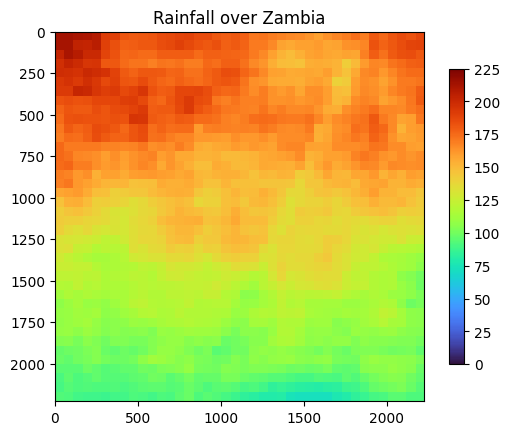

In [50]:
plt.imshow(rcSum2np[0], interpolation='none', vmin = 0, vmax = 225, cmap = 'turbo') 
plt.axis('on')
plt.colorbar(shrink=0.8)
plt.title('Rainfall over Zambia')

Continue with another selected collection or create your own code further below.

In [51]:
datacube = connection.load_collection(
  "COPERNICUS/S1_GRD",
  spatial_extent={"west": 16.06, "south": 48.06, "east": 16.65, "north": 48.35},
  temporal_extent=["2017-03-01", "2017-04-01"],
  bands=["VV", "VH"]
)

In [52]:
datacube.download(work_dir+'/S1.tif')

In [53]:
rcSelect = ilwis.RasterCoverage('S1.tif')

In [54]:
VV = ilwis.do('selection',rcSelect,"rasterbands(0)")
VH = ilwis.do('selection',rcSelect,"rasterbands(1)")

In [55]:
#calculate the cross polarized image (vv/vh)
VC = ilwis.do('mapcalc','(@1/@2)', VV, VH)

In [56]:
#create histogram using large number of bins, given the fact that the input image is a float64, with both positive and negative numbers
hist = VC.statistics(ilwis.PropertySets.pHISTOGRAM, 65535)
minPerc1, maxPerc1 = hist.calcStretchRange(1)
VCs = ilwis.do('linearstretch',VC, minPerc1, maxPerc1)
VCs = ilwis.do('setvaluerange', VCs, 0, 255, 1)
VCs.store('VCs.mpr')

In [57]:
VVs = ilwis.do('linearstretch',VV, 1)
VVs = ilwis.do('setvaluerange', VVs, 0, 255, 1)
VVs.store('VVs.mpr')
VV_2np = np.fromiter(iter(VVs), np.ubyte, VVs.size().linearSize()) 
VV_2np = VV_2np.reshape((VVs.size().ysize, VVs.size().xsize))

VHs = ilwis.do('linearstretch',VH, 1)
VHs = ilwis.do('setvaluerange', VHs, 0, 255, 1)
VHs.store('VHs.mpr')
VH_2np = np.fromiter(iter(VHs), np.ubyte, VHs.size().linearSize()) 
VH_2np = VH_2np.reshape((VHs.size().ysize, VHs.size().xsize))

#VCs = ilwis.do('linearstretch',VC_adjust, 1)
#VCs = ilwis.do('setvaluerange', VCs, 0, 255, 0.001)
#VCs.store('VCs.mpr')
VC_2np = np.fromiter(iter(VCs), np.ubyte, VCs.size().linearSize()) 
VC_2np = VC_2np.reshape((VCs.size().ysize, VCs.size().xsize))

In [58]:
# create  color composite (in RGB)
cc = np.dstack((VV_2np, VH_2np, VC_2np))

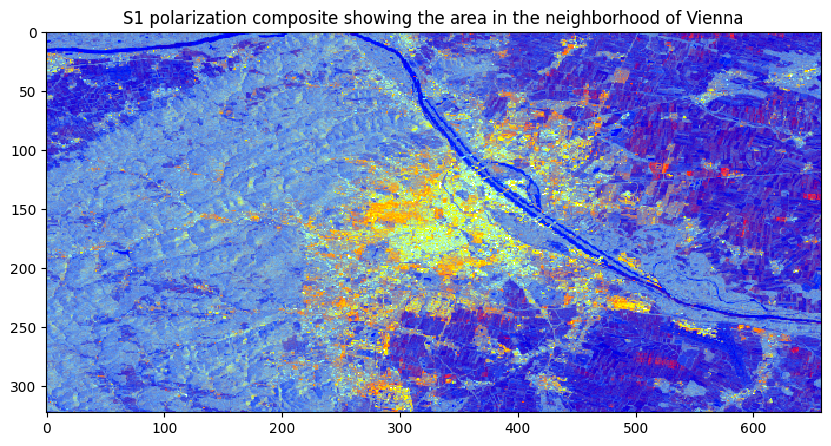

In [60]:
plt.figure(figsize=(10, 7))
plt.imshow(cc, interpolation ='nearest')
plt.title('S1 polarization composite showing the area in the neighborhood of Vienna');

#### Now connect to dataspace.copernicus.eu

This requires registration at: https://dataspace.copernicus.eu/, select the option "Login" and if you don't have an account, create a new account and sign in.

In [61]:
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [62]:
print(connection.list_collection_ids())

['SENTINEL3_OLCI_L1B', 'SENTINEL3_SLSTR', 'SENTINEL_5P_L2', 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON1', 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON2', 'COPERNICUS_PLANT_PHENOLOGY_INDEX', 'ESA_WORLDCOVER_10M_2020_V1', 'ESA_WORLDCOVER_10M_2021_V2', 'COPERNICUS_VEGETATION_INDICES', 'SENTINEL2_L1C', 'SENTINEL2_L2A', 'SENTINEL1_GRD', 'COPERNICUS_30', 'LANDSAT8_L2', 'SENTINEL3_SYN_L2_SYN', 'SENTINEL3_SLSTR_L2_LST', 'SENTINEL1_GLOBAL_MOSAICS']


In [63]:
connection.describe_collection("SENTINEL2_L2A")

{'assets': {'thumbnail': {'href': 'https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2022/07/tallinn_estonia/24383281-1-eng-GB/Tallinn_Estonia_pillars.jpg',
   'roles': ['thumbnail'],
   'title': 'Sentinel 2 L2A',
   'type': 'image/png'}},
 'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B8A',
    'B09',
    'B11',
    'B12',
    'WVP',
    'AOT',
    'SCL',
    'sunAzimuthAngles',
    'sunZenithAngles',
    'viewAzimuthMean',
    'viewZenithMean']},
  't': {'extent': ['2015-07-04T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-56, 83],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': 'SENTINEL-2 is a wide-swath, high-resolution, multi-spectral imaging mission, supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas. The SENTINEL-2 Multispectral Instrument (MSI) samples 13 spectral bands: four bands at 10 metres, six bands at 20 metres and three bands at 60 metres spatial resolution.\n The level 2A data is atmospherically corrected using Sen2Cor.',
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-07-04T00:00:00Z', None]]}},
 'id': 'SENTINEL2_L2A',
 'keywords': ['COPERNICUS',
  'ESA',
  'Orthoimagery',
  'Sentinel-2',
  'MSI',
  'Level-2A',
  'Radiometry',
  'Plant Resource',
  'TOC'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinels.copernicus.eu/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license',
   'type': 'application/pdf'},
  {'href': 'https://documentation.dataspace.copernicus.eu/Data/SentinelMissions/Sentinel2.html#sentinel-2-level-2a-top-of-canopy-toc',
   'rel': 'alternate',
   'type': 'application/html'},
  {'href': 'https://dataspace.copernicus.eu/browser/?zoom=11&lat=45.36638&lng=12.49832&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2F28b654e7-8912-4e59-9e58-85b58d768b3a&datasetId=S2

#### Retrieve Sentinel 2 data
Select for a given temporal range and area of interest, using a cloud cover threshold the 10 meter spatial resolution channels, b2, b3, b4 and b8 (visible blue, green and red as well as the near infrared spectral channels)

In [64]:
t = ["2023-04-01", "2023-06-30"]
s2_cube = connection.load_collection("SENTINEL2_L2A",
    spatial_extent={'west': 5.00, 'east': 5.38, 'south': 52.58, 'north': 52.80,"crs": "EPSG:4326",},
    temporal_extent= t,
    bands=['B02', 'B03', 'B04', 'B08'],
    max_cloud_cover=1,
)

#### Temporal aggregation
From the selected images, perform a temporal aggregation, using the 'median' value for each pixel in your time series

In [65]:
s2_cube_red = s2_cube.median_time()

#### Download the selected dataset

In [66]:
s2_cube_red.download(work_dir+'/Enkhuizen.tif')

#### Further raster image processing
Load the downloaded image in ILWISPy, select the 4 spectral channels as Blue, Green, Red and IR, calculate statistics and conduct a linear stretch operation 

In [67]:
raster = ilwis.RasterCoverage ('Enkhuizen.tif')
print(raster.size())

Size(2643, 2526, 4)


In [68]:
Blue =  ilwis.do('selection',raster,"rasterbands(0)")
Green = ilwis.do('selection',raster,"rasterbands(1)")
Red = ilwis.do('selection',raster,"rasterbands(2)")
IR = ilwis.do('selection',raster,"rasterbands(3)")
print(IR.size().xsize)
print(IR.size().ysize)
print(IR.size().zsize)

2643
2526
1


In [69]:
stat_blue = Blue.statistics(ilwis.PropertySets.pHISTOGRAM, 65535)
minPerc1, maxPerc1 = stat_blue.calcStretchRange(1)
Blues = ilwis.do('linearstretch',Blue, minPerc1, maxPerc1)
Blues = ilwis.do('setvaluerange', Blues, 0, 255, 1)

In [70]:
stat_green = Green.statistics(ilwis.PropertySets.pHISTOGRAM, 65535)
minPerc1, maxPerc1 = stat_green.calcStretchRange(1)
Greens = ilwis.do('linearstretch',Green, minPerc1, maxPerc1)
Greens = ilwis.do('setvaluerange', Greens, 0, 255, 1)

In [71]:
stat_red = Red.statistics(ilwis.PropertySets.pHISTOGRAM, 65535)
minPerc1, maxPerc1 = stat_red.calcStretchRange(1)
Reds = ilwis.do('linearstretch',Red, minPerc1, maxPerc1)
Reds = ilwis.do('setvaluerange', Reds, 0, 255, 1)

In [72]:
stat_ir = IR.statistics(ilwis.PropertySets.pHISTOGRAM, 65535)
minPerc1, maxPerc1 = stat_ir.calcStretchRange(1)
IRs = ilwis.do('linearstretch',IR, minPerc1, maxPerc1)
IRs = ilwis.do('setvaluerange', IRs, 0, 255, 1)

#### Transform to a Numpy array
Transform your stretched layers to a Numpy array, in order to visualize your image as a colour composite, using imshow

In [73]:
Blues_2np = np.fromiter(iter(Blues), np.ubyte, IRs.size().linearSize()) 
Blues_2np = Blues_2np.reshape((IRs.size().ysize, IRs.size().xsize))

Greens_2np = np.fromiter(iter(Greens), np.ubyte, IRs.size().linearSize()) 
Greens_2np = Greens_2np.reshape((IRs.size().ysize, IRs.size().xsize))

Reds_2np = np.fromiter(iter(Reds), np.ubyte, IRs.size().linearSize()) 
Reds_2np = Reds_2np.reshape((IRs.size().ysize, IRs.size().xsize))

IRs_2np = np.fromiter(iter(IRs), np.ubyte, IRs.size().linearSize()) 
IRs_2np = IRs_2np.reshape((IRs.size().ysize, IRs.size().xsize))

In [74]:
# create  color composite (in RGB)
fc_S2 = np.dstack((IRs_2np, Reds_2np, Greens_2np))
nc_S2 = np.dstack((Reds_2np, Greens_2np, Blues_2np))
S2ALL = np.array([IRs_2np, Reds_2np, Greens_2np, Blues_2np])

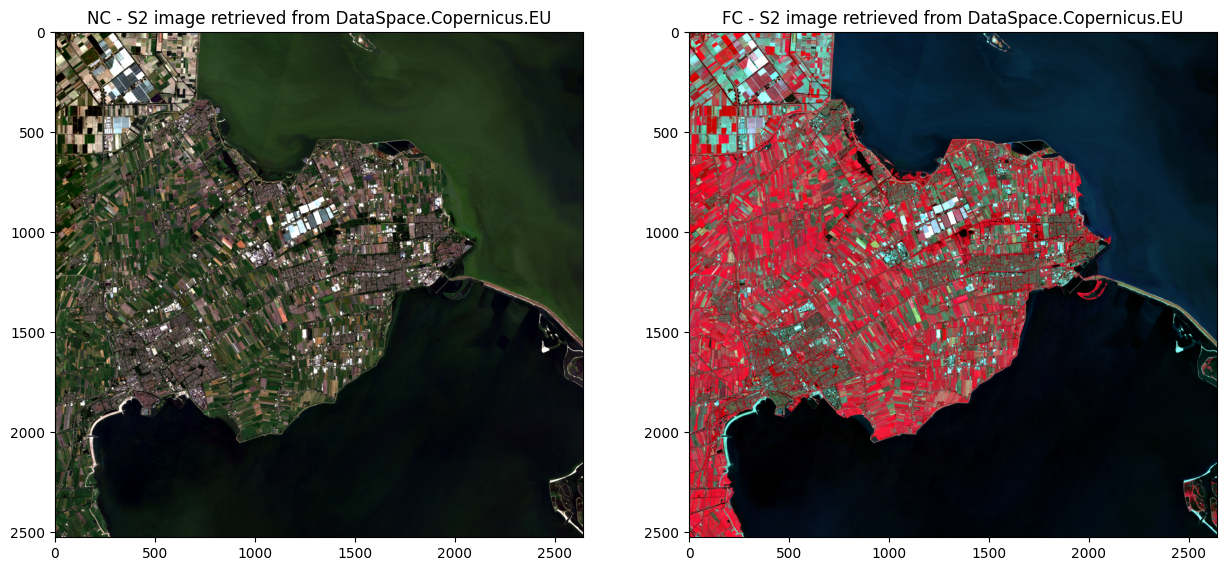

In [75]:
fig1 = plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(nc_S2)
plt.title('NC - S2 image retrieved from DataSpace.Copernicus.EU')
plt.subplot(1, 2, 2)
plt.imshow(fc_S2)
plt.title('FC - S2 image retrieved from DataSpace.Copernicus.EU');

#### Export results as a new ILWIS image
Create a new  / empty image and as second step load the data and write the output to disk. Review your results using ILWIS386

In [76]:
#create empty ilwis raster 
S2_ilw = ilwis.RasterCoverage()
defNumr = ilwis.DataDefinition(ilwis.NumericDomain('code=value'), ilwis.NumericRange(0, 255, 1))
S2_ilw.setDataDef(defNumr)
S2_ilw.setSize(ilwis.Size(2643, 2526, 4))
S2_ilw.setGeoReference(raster.geoReference())

In [77]:
S2_ilw.array2raster(S2ALL.flatten())

In [78]:
S2_ilw.store('Enkhuizen.mpl')

#### Four Seasons
Derive the NDVI for the four seasons (summer, autumn, winter and spring) and calulate the Standard Deviation over the different seasons to get an idea of the variability

In [79]:
#summer
t = ["2022-06-01", "2022-08-31"]
summer = connection.load_collection("SENTINEL2_L2A",
    spatial_extent={'west': 5.00, 'east': 5.38, 'south': 52.58, 'north': 52.80,"crs": "EPSG:4326",},
    temporal_extent= t,
    bands=['B02', 'B03', 'B04', 'B08'],
    max_cloud_cover=1,
)

In [80]:
summer_red = summer.median_time()

In [81]:
summer_red.download(work_dir+'/summer.tif')

In [82]:
#autumn - note cloud cover has been set differently elso no image would qualify!
t = ["2022-09-01", "2022-11-30"]
autumn = connection.load_collection("SENTINEL2_L2A",
    spatial_extent={'west': 5.00, 'east': 5.38, 'south': 52.58, 'north': 52.80,"crs": "EPSG:4326",},
    temporal_extent= t,
    bands=['B02', 'B03', 'B04', 'B08'],
    max_cloud_cover=20,
)

In [83]:
autumn_red = autumn.median_time()

In [84]:
autumn_red.download(work_dir+'/autumn.tif')

In [85]:
#winter
t = ["2022-12-01", "2023-02-28"]
winter = connection.load_collection("SENTINEL2_L2A",
    spatial_extent={'west': 5.00, 'east': 5.38, 'south': 52.58, 'north': 52.80,"crs": "EPSG:4326",},
    temporal_extent= t,
    bands=['B02', 'B03', 'B04', 'B08'],
    max_cloud_cover=1,
)

In [86]:
winter_red = winter.median_time()

In [87]:
winter_red.download(work_dir+'/winter.tif')

In [88]:
#spring - note cloud cover has been set differently elso no image would qualify!
t = ["2023-03-01", "2023-03-31"]
spring = connection.load_collection("SENTINEL2_L2A",
    spatial_extent={'west': 5.00, 'east': 5.38, 'south': 52.58, 'north': 52.80,"crs": "EPSG:4326",},
    temporal_extent= t,
    bands=['B02', 'B03', 'B04', 'B08'],
    max_cloud_cover=20,
)

In [89]:
spring_red = spring.median_time()

In [90]:
spring_red.download(work_dir+'/spring.tif')

In [91]:
summer = ilwis.RasterCoverage ('summer.tif')
autumn = ilwis.RasterCoverage ('autumn.tif')
winter = ilwis.RasterCoverage ('winter.tif')
spring = ilwis.RasterCoverage ('spring.tif')

In [92]:
summer_Red = ilwis.do('selection',summer,"rasterbands(2)")
summer_IR = ilwis.do('selection',summer,"rasterbands(3)")
summer_ndvi = ilwis.do('mapcalc','(@1 - @2)/(@1 + @2)', summer_IR, summer_Red)
summer_ndvi = ilwis.do('setvaluerange', summer_ndvi, -1, 1, 0.001)

In [93]:
autumn_Red = ilwis.do('selection',autumn,"rasterbands(2)")
autumn_IR = ilwis.do('selection',autumn,"rasterbands(3)")
autumn_ndvi = ilwis.do('mapcalc','(@1 - @2)/(@1 + @2)', autumn_IR, autumn_Red)
autumn_ndvi = ilwis.do('setvaluerange', autumn_ndvi, -1, 1, 0.001)

In [94]:
winter_Red = ilwis.do('selection',winter,"rasterbands(2)")
winter_IR = ilwis.do('selection',winter,"rasterbands(3)")
winter_ndvi = ilwis.do('mapcalc','(@1 - @2)/(@1 + @2)', winter_IR, winter_Red)
winter_ndvi = ilwis.do('setvaluerange', winter_ndvi, -1, 1, 0.001)

In [95]:
spring_Red = ilwis.do('selection',spring,"rasterbands(2)")
spring_IR = ilwis.do('selection',spring,"rasterbands(3)")
spring_ndvi = ilwis.do('mapcalc','(@1 - @2)/(@1 + @2)', spring_IR, spring_Red)
spring_ndvi = ilwis.do('setvaluerange', spring_ndvi, -1, 1, 0.001)

In [96]:
summer_ndvi_2np = np.fromiter(iter(summer_ndvi), np.float64, summer_ndvi.size().linearSize()) 
summer_ndvi_2np = summer_ndvi_2np.reshape((summer_ndvi.size().ysize, summer_ndvi.size().xsize))

autumn_ndvi_2np = np.fromiter(iter(autumn_ndvi), np.float64, summer_ndvi.size().linearSize()) 
autumn_ndvi_2np = autumn_ndvi_2np.reshape((summer_ndvi.size().ysize, summer_ndvi.size().xsize))

winter_ndvi_2np = np.fromiter(iter(winter_ndvi), np.float64, summer_ndvi.size().linearSize()) 
winter_ndvi_2np = winter_ndvi_2np.reshape((summer_ndvi.size().ysize, summer_ndvi.size().xsize))

spring_ndvi_2np = np.fromiter(iter(spring_ndvi), np.float64, summer_ndvi.size().linearSize()) 
spring_ndvi_2np = spring_ndvi_2np.reshape((summer_ndvi.size().ysize, summer_ndvi.size().xsize))

In [97]:
print(summer_ndvi.size())

Size(2643, 2526, 1)


In [98]:
#create empty ilwis raster 
S2_ndvi_all = ilwis.RasterCoverage()
defNumr = ilwis.DataDefinition(ilwis.NumericDomain('code=value'), ilwis.NumericRange(-1, 1, 0.001))
S2_ndvi_all.setDataDef(defNumr)
S2_ndvi_all.setSize(ilwis.Size(2643, 2526, 4))
S2_ndvi_all.setGeoReference(summer_ndvi.geoReference())

In [99]:
S2_ndvi = np.array([summer_ndvi_2np, autumn_ndvi_2np, winter_ndvi_2np, spring_ndvi_2np])

In [100]:
S2_ndvi_all.array2raster(S2_ndvi.flatten())

In [101]:
S2_ndvi_all.store('S2_ndvi.mpl')

In [102]:
ilwis.operationMetaData('aggregaterasterstatistics')

'aggregaterasterstatistics(inputraster,statisticalmarker=mean|variance|standarddev|totalsumsquares|skew|kurtosis|max|min|maxindex|minindex|median|sum)'

In [103]:
ndvi_std = ilwis.do('aggregaterasterstatistics', S2_ndvi_all, 'standarddev')
ndvi_var = ilwis.do('aggregaterasterstatistics', S2_ndvi_all, 'variance')

In [104]:
#masking the water using the cloud free composite IR band
ndvi_mask = ilwis.do('mapcalc','iff(@1 < 13,0,1)', IRs)
ndvi_mask = ilwis.do('setvaluerange', ndvi_mask, 0, 1, 1)
ndvi_mask.store('Enkhuizen_mask.mpr')

In [105]:
ndvi_std_mask = ilwis.do('mapcalc','iff(@1 == 1,@2,0)', ndvi_mask, ndvi_std)
ndvi_var_mask = ilwis.do('mapcalc','iff(@1 == 1,@2,0)', ndvi_mask, ndvi_var)
ndvi_std_mask.store('S2_ndviSTD.mpl')
ndvi_var_mask.store('S2_ndviVAR.mpl')

What can be concluded if looking at the areas with the higher variances and standard deviations?